<a href="https://colab.research.google.com/github/CBrown345/DSPS_CBrown/blob/main/instructions_coin_tosses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports here
import numpy as np
import matplotlib.pylab as plt


(array([5., 0., 5.]),
 array([-0.1,  0.1,  0.9,  1.1]),
 <BarContainer object of 3 artists>)

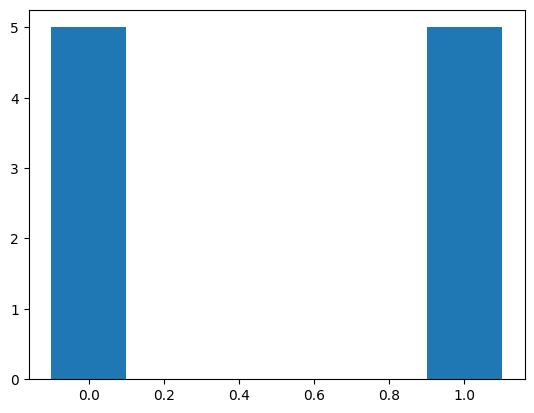

In [ ]:
# get 10 coin tosses with the numpy.random.rand function, make a histogram
np.random.seed(302)
container = []
N = 10
for i in range(N):
  #heads = 0, tails = 1
  container.append(round(np.random.rand()))
plt.hist(container, bins = [-.1, .1, 0.9,1.1])


P(H) = 0.5


P(HH) = 0.25

P(HHT) = 0.125

P(2H & 1T) =  0.25

$P(N_H; N_T) = P(H)^{N_H} * P(T)^{N_T} * {N_H + N_T \choose  N_H} $

In [ ]:
from math import comb
P_2H_8T =
print(f"the probability of 2H and 8T is {P_2H_8T}")

the probability of 2H and 8T is Ellipsis


# Fair coin

The binomial distribution is the distribution that described the probability of getting outcome X $N$ times out of $M$ trials for a 2-outcome experiments with each trial with the same probability P(X).

Now show binomial distribution for 30 coin tosses of a _fair_ coin.

In [ ]:
import scipy as sp

In [ ]:
sp.stats.binom?

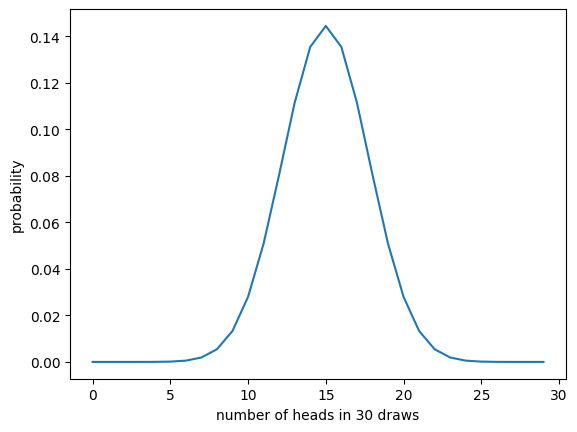

In [ ]:
support = np.arange(0, 30)
plt.plot(support, sp.stats.binom.pmf(support, 30, 0.5));
plt.xlabel("number of heads in 30 draws")
plt.ylabel("probability");

# vegas coin
lets weight the coin toward tail (by 30%) and show the binomial distribution of probabilities

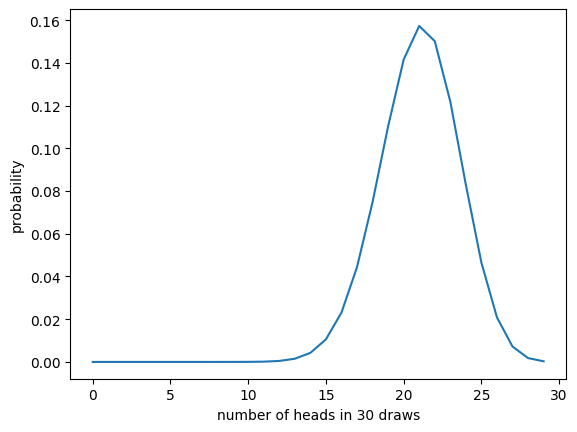

In [ ]:
support = np.arange(0, 30)
plt.plot(support, sp.stats.binom.pmf(support, 30, 0.7));
plt.xlabel("number of heads in 30 draws")
plt.ylabel("probability");

Now get 10 draws from the same probability distributin, plot the histogram of outcomes, and compare it to the _theoretical_ binomial probability distributions

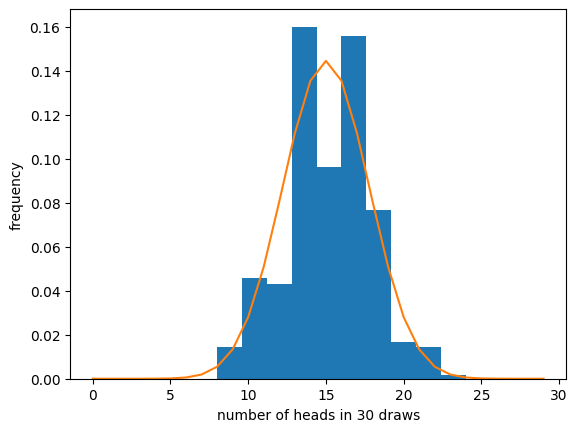

In [ ]:
draws = sp.stats.binom.rvs(30,0.5, size = 1000)
plt.hist(draws, density = True)
plt.plot(support, sp.stats.binom.pmf(support, 30, 0.5))
plt.xlabel("number of heads in 30 draws")
plt.ylabel("frequency");

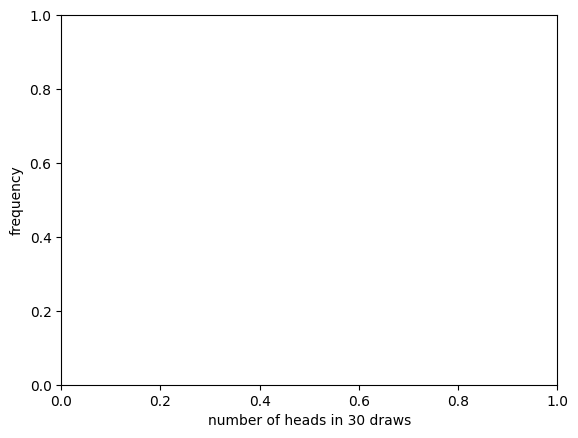

In [ ]:
#Do it for a sample of 100
...
plt.xlabel("number of heads in 30 draws")
plt.ylabel("frequency");

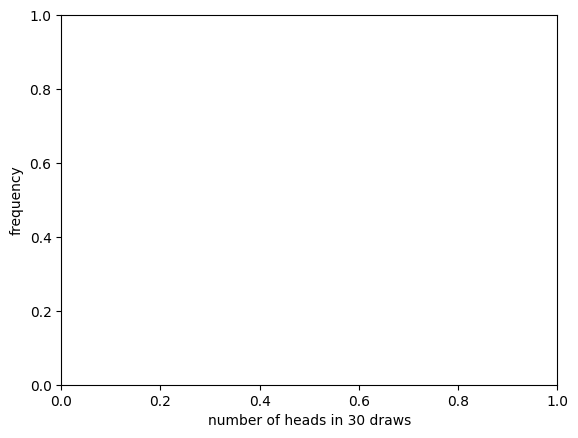

In [ ]:
#Do it for a sample of 1000
...
plt.xlabel("number of heads in 30 draws")
plt.ylabel("frequency");

now do it for the vegas coin we used before

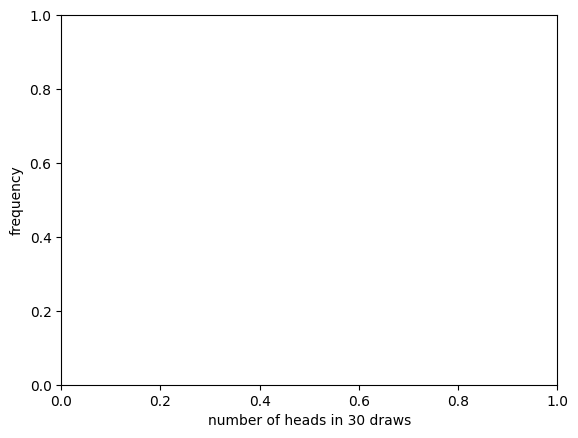

In [ ]:
#vegas coin
#Do it for a sample of 1000

...
plt.xlabel("number of heads in 30 draws")
plt.ylabel("frequency");

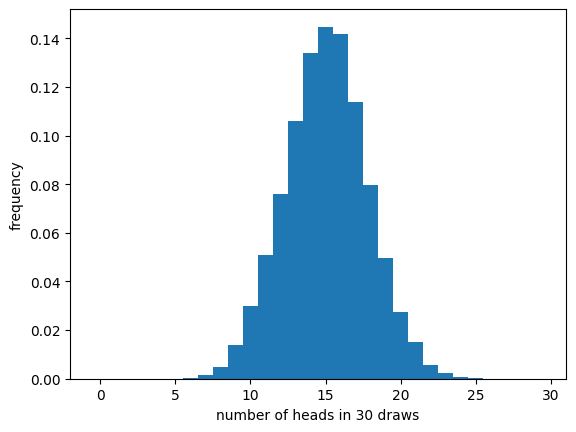

In [ ]:
# we can also do it the hacky way if we dont know or want to use a package with a fundtion that is under the hood and we dont see
cointoss = np.zeros(10_000)
for i in range(10_000):
  cointoss[i] = np.round(np.random.rand(30)).sum()

plt.hist(cointoss, bins=np.arange(-0.5,30), density=True);
#cointoss
plt.ylabel("frequency")
plt.xlabel("number of heads in 30 draws");


1.0


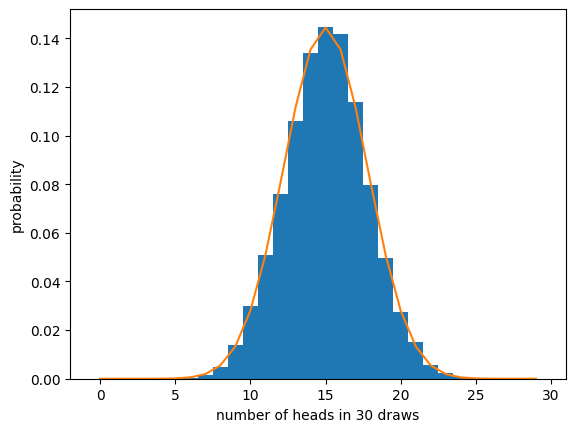

In [ ]:
print(plt.hist(cointoss, bins=np.arange(-0.5,30), density=True)[0].sum())
plt.plot(support, sp.stats.binom.pmf(support, 30, 0.5));

plt.xlabel("number of heads in 30 draws")
plt.ylabel("probability");

# BAYESIAN PROBABILITY
add a prior : you are in vegas and you are sure you are going to get tricked - assume your coin has 0 probability to get heads

In [ ]:
x = np.linspace(0,1,100)

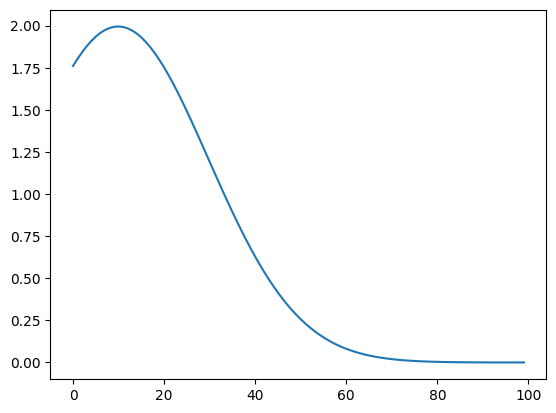

In [ ]:
# prior = np.zeros_like(x)
# prior[:50] = 1
prior = sp.stats.norm.pdf(x,0.1,0.2)
plt.plot(prior)

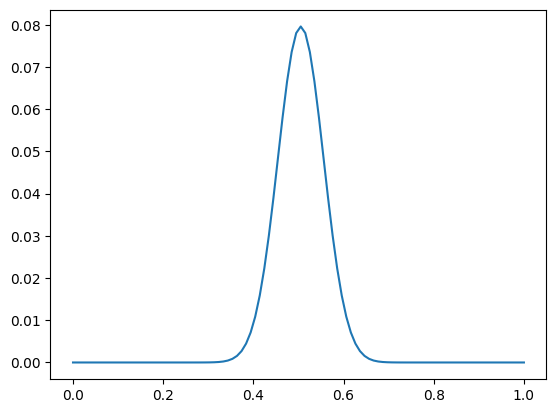

In [ ]:
likelihood = sp.stats.binom.pmf((x*100).astype(int),100,0.5)
plt.plot(x, likelihood)

Text(0.5, 0, 'probability of H')

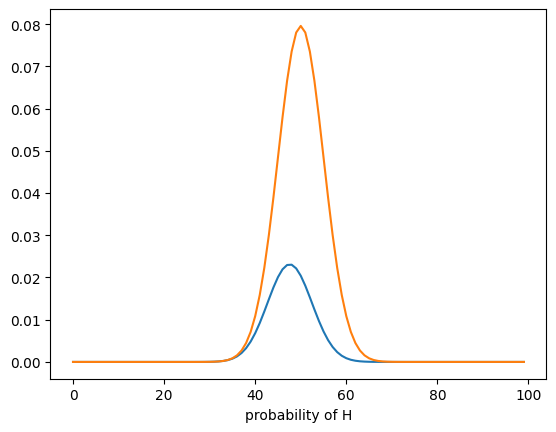

In [ ]:
#0 probability of getting heads=1, 100% probability of getting tails...
plt.plot(likelihood * prior)
plt.plot(likelihood )
#plt.plot(x, prior, label="prior")
plt.xlabel("probability of H")
#plt.yticks([0, 1], ["head", "tail"]);

In [ ]:
#BAYES THEOREM:
#Posterior = likelihood * prior / evidence ~ likelihood * priori
x = np.linspace(0.0, 1, 100)
likelihood = sp.stats.binom.pmf((x * 100).astype(int), 100, 0.5)
posterior = ...
plt.plot(x, posterior, label="unnormalized probability")
plt.xlabel("probability of H")
plt.legend();
plt.yticks([]);

In [ ]:
#try a continuous, never 0 prior
prior = ...
plt.plot(x, prior, label="prior")
plt.xlabel("probability of H")
plt.legend();
plt.yticks([]);


In [ ]:
posterior = ...
plt.plot(x, posterior, label="unnormalized posterior unfair coin")
plt.plot(x, sp.stats.binom.pmf((x * 100).astype(int), 100, 0.5) / 3.45, label="fair coin")
plt.xlabel("probability of H")
plt.legend();
plt.yticks([]);